In [11]:
import pandas as pd

try:
    df = pd.read_csv('iris.csv')
except FileNotFoundError:
    print("Error: The data file was not found. Please check the file path.")
    df = None
except pd.errors.EmptyDataError:
    print("Error: The file is empty.")
    df = None
except pd.errors.ParserError:
    print("Error: The file could not be parsed. Check if it is a valid CSV.")
    df = None

print(df.head())

print(df.isnull().sum())  # Shows count of missing values per column
if df is not None:
    # Check for missing data and handle it
    if df.isnull().values.any():
        print("Warning: Missing data found. Filling missing values with column mean (for numeric columns).")
        df.fillna(df.mean(numeric_only=True), inplace=True)

#Explore the structure: check data types and missing values
print(df.info())  # Shows columns, data types, and non-null counts

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [12]:
# Basic statistics for numerical columns
stats = df.describe()
print(stats)

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [13]:
grouped_means = df.groupby('species').mean()
print(grouped_means)

            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa             5.006        3.418         1.464        0.244
versicolor         5.936        2.770         4.260        1.326
virginica          6.588        2.974         5.552        2.026


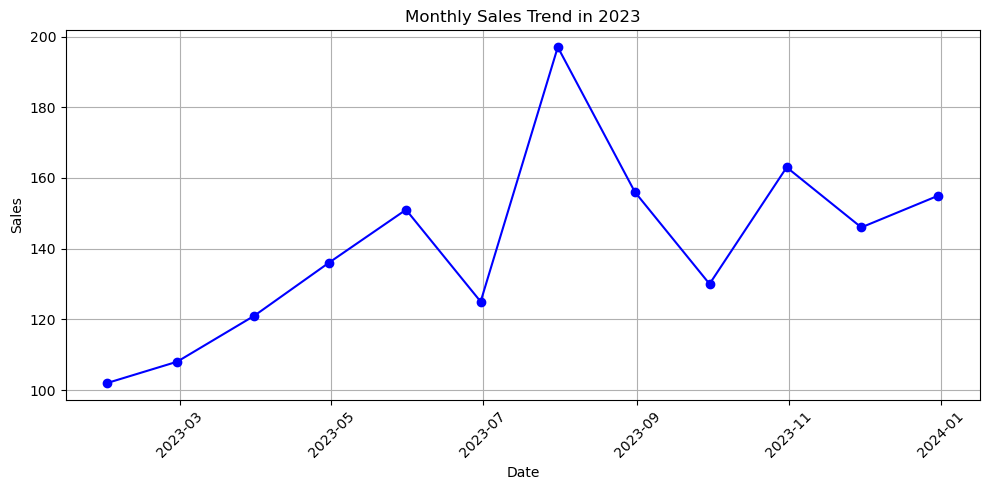

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#line chart example, create a sample time-series sales data
dates = pd.date_range(start='2023-01-01', periods=12, freq='M')
sales = np.random.randint(100, 200, size=12)
sales_data = pd.DataFrame({'Date': dates, 'Sales': sales})
plt.figure(figsize=(10, 5))
plt.plot(sales_data['Date'], sales_data['Sales'], marker='o', linestyle='-', color='b')
plt.title('Monthly Sales Trend in 2023')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

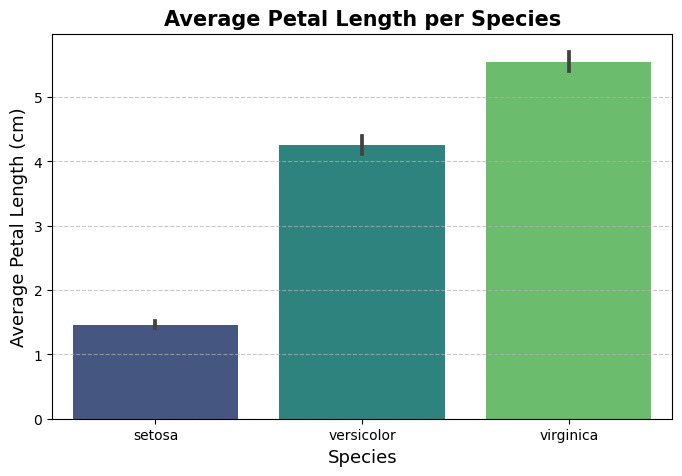

In [14]:
#bar graph
plt.figure(figsize=(8, 5))
sns.barplot(x='species', y='petal_length', data=df, palette='viridis')
plt.title('Average Petal Length per Species', fontsize=15, fontweight='bold')
plt.xlabel('Species', fontsize=13)
plt.ylabel('Average Petal Length (cm)', fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

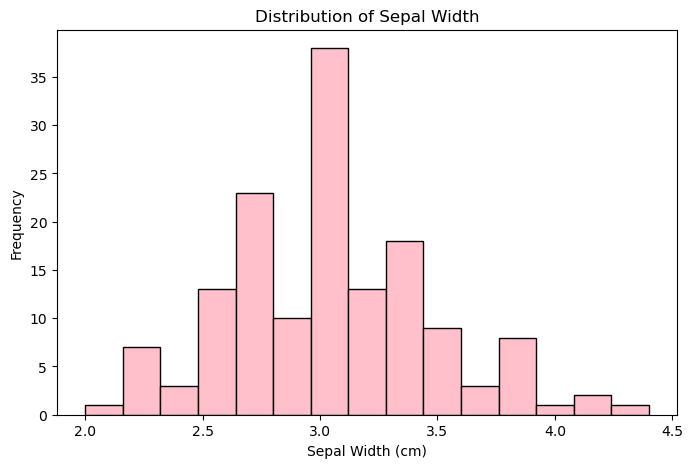

In [7]:
#histogram
plt.figure(figsize=(8, 5))
plt.hist(df['sepal_width'], bins=15, color='pink', edgecolor='black')
plt.title('Distribution of Sepal Width')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Frequency')
plt.show()

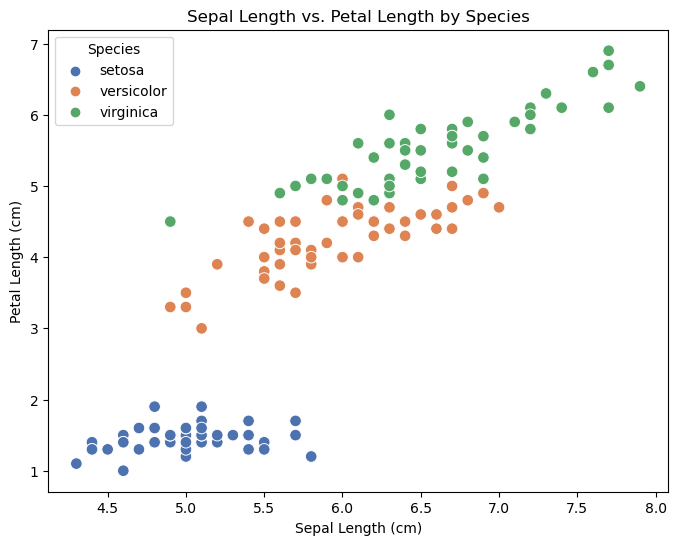

In [8]:
#scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sepal_length', y='petal_length', hue='species', data=df, palette='deep', s=70)
plt.title('Sepal Length vs. Petal Length by Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.legend(title='Species')
plt.show()